# Project Phase III: Logica Design and Queries

Based on the feedback you received from previous milstones, using Logica to design the model and translate SQL queries in this notebook.

Note: You might check **company/Logica_COMPANY.ipynb** for more information 

### Package Installation

First-time users need to install the following packages

In [2]:
!python3 -m pip install logica
!python3 -m pip install pandas
!pip install ipython-sql

After running the cell above, please restart the kernel to move on

### Package Import

You can disregard the messages ("Could not import ...") when executing the cell below

In [3]:
from logica import colab_logica
import pandas as pd
import sqlite3

Could not import google.cloud.bigquery.
Could not import google.cloud.auth.
Could not import google.colab.widgets.


In [4]:
colab_logica.SetPreamble(
    '@Engine("sqlite"); @AttachDatabase("mydata", "my_database.db");'
)

In [5]:
%load_ext sql

### Database Creation [10pts]

Logica is typically run on a database. Since we only possess CSV files, we need first create a database.

**Note: Upload your csv files to `datasets` folder.**

In [6]:
# Read csv files as Pandas DataFrame [2pts]
# Insert your code below:
Dis = pd.read_csv("datasets/DischargeLocation.csv")
Pat = pd.read_csv("datasets/Patient.csv")
Cas = pd.read_csv("datasets/CaseManager.csv")
Hea = pd.read_csv("datasets/HealthRecord.csv")
Med = pd.read_csv("datasets/Medication.csv")
Tes = pd.read_csv("datasets/TestResult.csv")
Gen = pd.read_csv("datasets/GeneralHealthStatus.csv")
Lab = pd.read_csv("datasets/LaboratoryData.csv")
Xra = pd.read_csv("datasets/XRayResult.csv")

In [7]:
# Lowercase the columns from all of the tables [Ignore this step if they're already lowercase] [2pts]
# Insert your code below: 
Dis.columns = Dis.columns.str.lower()
Pat.columns = Pat.columns.str.lower()
Cas.columns = Cas.columns.str.lower()
Hea.columns = Hea.columns.str.lower()
Med.columns = Med.columns.str.lower()
Tes.columns = Tes.columns.str.lower()
Gen.columns = Gen.columns.str.lower()
Lab.columns = Lab.columns.str.lower()
Xra.columns = Xra.columns.str.lower()

In [8]:
# Using sqlite3 to create database and create tables [6pts]
# Note: Name the database with your group ID
# Insert your code below:
conn = sqlite3.connect("my_database.db")
Dis.to_sql("DischargeLocation", conn, if_exists="replace", index=False)
Pat.to_sql("Patient", conn, if_exists="replace", index=False)
Cas.to_sql("CaseManager", conn, if_exists="replace", index=False)
Hea.to_sql("HealthRecord", conn, if_exists="replace", index=False)
Med.to_sql("Medication", conn, if_exists="replace", index=False)
Tes.to_sql("TestResult", conn, if_exists="replace", index=False)
Gen.to_sql("GeneralHealthStatus", conn, if_exists="replace", index=False)
Lab.to_sql("LaboratoryData", conn, if_exists="replace", index=False)
Xra.to_sql("XRayResult", conn, if_exists="replace", index=False)


conn.close()

### Queries [30pts]
#### Translate your SQL queries from Project Milestone II to Logica queries

To earn the full points, please ensure you fulfill all the three requirements as following:
- Write the queries in English [2pts]
- Write the queries in SQL (copy-paste from phase II)[2pts]
- Write the queries in Logica [7pts]

Note: If you find it hard to do the translation, provide 2 to 3 sentences to explain 

#### Query 0: Your Query in English

In [9]:
%%sql sqlite:///my_database.db
SELECT 
    p.PatientID, 
    p.Name AS PatientName, 
    p.CohabitantsHealthStatus,
    cm.Cname AS CaseManagerName 
FROM 
    Patient p 
JOIN 
    CaseManager cm ON p.PatientID = cm.PatientID 
WHERE 
    cm.Cname = 'Sam Taylor'

Done.


patientid,PatientName,cohabitantshealthstatus,CaseManagerName
1,John Doe,Healthy,Sam Taylor


Query is stored at PatientWithCaseManagerSamTaylor_sql variable.


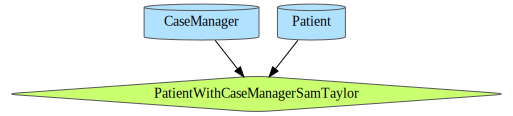

Running predicate: PatientWithCaseManagerSamTaylor (1 ms)
The following table is stored at PatientWithCaseManagerSamTaylor variable.


,patientid,name,cohabitantshealthstatus,cname
0,1,John Doe,Healthy,Sam Taylor


In [10]:
%%logica PatientWithCaseManagerSamTaylor
PatientWithCaseManagerSamTaylor(patientid:, name: , cohabitantshealthstatus:, cname:) :-
    Patient(patientid:, name:, cohabitantshealthstatus: ),
    CaseManager(cname:, patientid:),
    cname == "Sam Taylor";

#### Query 1:  Your query in English

In [11]:
%%sql sqlite:///my_database.db
SELECT 
    p.PatientID, 
    p.Name, 
    tr.TestDate, 
    tr.ResultBrief 
FROM 
    Patient p 
JOIN 
    HealthRecord hr ON p.PatientID = hr.PatientID 
JOIN 
    TestResult tr ON hr.HealthRecordID = tr.HealthRecordID 
WHERE 
    tr.TestName LIKE '%Cardiac%' AND 
    tr.ResultBrief LIKE '%Abnormal%'

Done.


patientid,name,testdate,resultbrief
5,Carol White,2023-05-05,Abnormal


Query is stored at PatientsWithAbnormalHeartTests_sql variable.


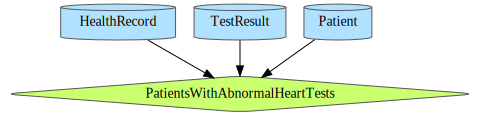

Running predicate: PatientsWithAbnormalHeartTests (2 ms)
The following table is stored at PatientsWithAbnormalHeartTests variable.


,patientid,name,testdate,resultbrief
0,5,Carol White,2023-05-05,Abnormal


In [12]:
%%logica PatientsWithAbnormalHeartTests
# Insert your Logica query here:
PatientsWithAbnormalHeartTests(patientid:, name:, testdate:, resultbrief:) :-
    Patient(patientid:, name:),
    HealthRecord(patientid:, healthrecordid:),
    TestResult(testname:, resultbrief:, testdate:, healthrecordid: ),
    Like(testname, "%Cardiac%"),
    Like(resultbrief, "%Abnormal%");

#### Query 2: Your query in English

In [13]:
%%sql sqlite:///my_database.db
SELECT 
    p.Name,
    h.PatientID,
    h.AdmissionDate,
    h.DurationOfAdmission,
       CASE
           WHEN date(h.AdmissionDate, '+' || h.DurationOfAdmission || ' days') <= date('now') THEN 'Discharged'
           ELSE 'Not Discharged'
       END as DischargeStatus
FROM HealthRecord h
JOIN Patient p ON h.PatientID = p.PatientID
WHERE p.Name = 'John Doe'

Done.


name,patientid,admissiondate,durationofadmission,DischargeStatus
John Doe,1,2023-04-01,14,Discharged


Query is stored at PatientHospitalizationStatus_sql variable.


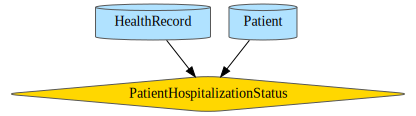

Running predicate: PatientHospitalizationStatus
--- SQL ---
SELECT
  Patient.name AS name,
  HealthRecord.patientid AS patientid,
  HealthRecord.admissiondate AS admissiondate,
  HealthRecord.durationofadmission AS durationofadmission,
  IF((DATE(HealthRecord.admissiondate, HealthRecord.durationofadmission, 'day') <= CURRENT_DATE()), 'Discharged', 'Not Discharged') AS dischargestatus
FROM
  HealthRecord, Patient
WHERE
  (Patient.patientid = HealthRecord.patientid) AND
  (Patient.name = 'John Doe')
[ Error ] Error while executing SQL:
Execution failed on sql 'SELECT
  Patient.name AS name,
  HealthRecord.patientid AS patientid,
  HealthRecord.admissiondate AS admissiondate,
  HealthRecord.durationofadmission AS durationofadmission,
  IF((DATE(HealthRecord.admissiondate, HealthRecord.durationofadmission, 'day') <= CURRENT_DATE()), 'Discharged', 'Not Discharged') AS dischargestatus
FROM
  HealthRecord, Patient
WHERE
  (Patient.patientid = HealthRecord.patientid) AND
  (Patient.name = 'Joh

DatabaseError: Execution failed on sql 'SELECT
  Patient.name AS name,
  HealthRecord.patientid AS patientid,
  HealthRecord.admissiondate AS admissiondate,
  HealthRecord.durationofadmission AS durationofadmission,
  IF((DATE(HealthRecord.admissiondate, HealthRecord.durationofadmission, 'day') <= CURRENT_DATE()), 'Discharged', 'Not Discharged') AS dischargestatus
FROM
  HealthRecord, Patient
WHERE
  (Patient.patientid = HealthRecord.patientid) AND
  (Patient.name = 'John Doe')': near "(": syntax error

In [35]:
%%logica PatientHospitalizationStatus
# Insert your Logica query here:
PatientHospitalizationStatus(name:, patientid:, admissiondate:, durationofadmission:, dischargestatus:) :-
    HealthRecord(healthrecordid:, patientid:, admissiondate:, durationofadmission:),
    Patient(patientid:, name:),
    name == "John Doe",
    dischargestatus == If(Date(admissiondate, durationofadmission, "day") <= CurrentDate(), "Discharged", "Not Discharged");
